### EDA - Basics

In [20]:
import numpy as np                             # Importing numpy
import pandas as pd                            # Importing pandas 
from pandas import Series, DataFrame           # Importing Series and DataFrame
%matplotlib inline
import matplotlib.pyplot as plt                # Importing matplotlib library
import seaborn as sns                          # Importing searborn library

HR=pd.read_csv('HR_comma_sep.csv',sep =',')    # Reading a comma delimited file
print(HR.shape)                                # Printing the shape of the dataset
HR.head()                                      # Checking the data is imported correctly

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 1

In [21]:
# Printing the existing columns headings and observations

print(HR.columns)
print(HR.index)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')
RangeIndex(start=0, stop=14999, step=1)


# 2

In [22]:
# To check if data is having null values and datatype.

HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 3

In [23]:
# To check the count of null values present in my dataset. 

HR.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# 4

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


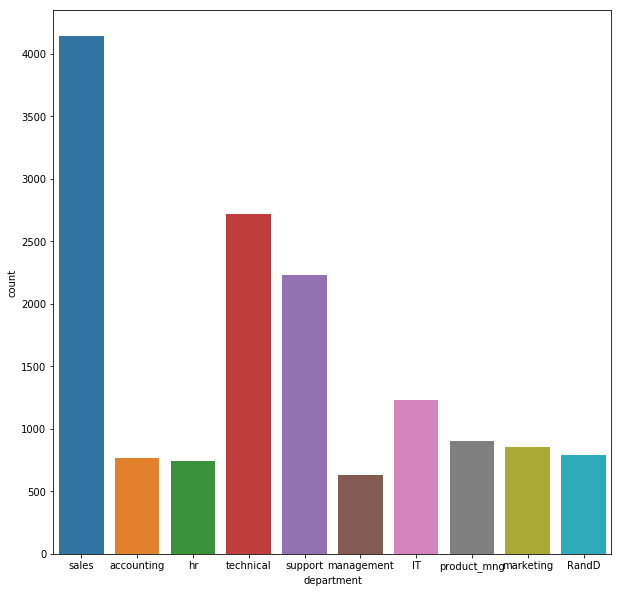

In [24]:
HR.rename(columns={'sales':'department'},inplace=True)    # Changing the heading of the column permanently
print(HR.columns)

fig,ax = plt.subplots(figsize=(10,10))                    # fixing size for the plots 
sns.countplot(HR['department'])                           # to check the count of the members in each department 
plt.show()


# 5

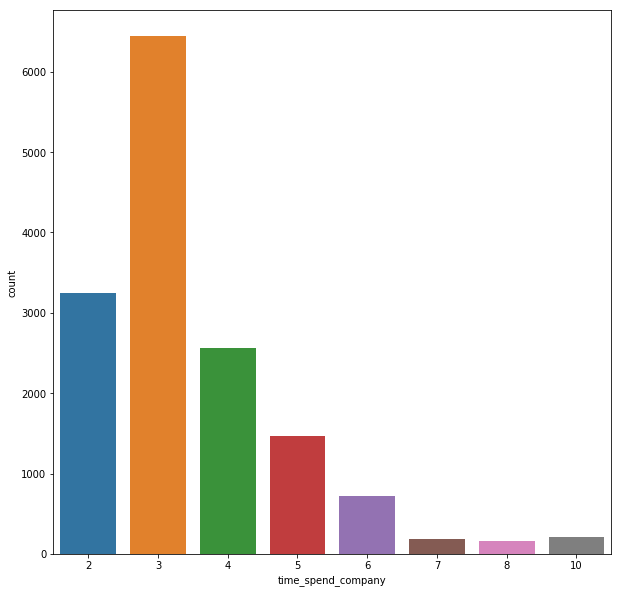

In [25]:
# To check the count of the average time spent by each employee in the company

fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(HR['time_spend_company'])
plt.show()

# 6

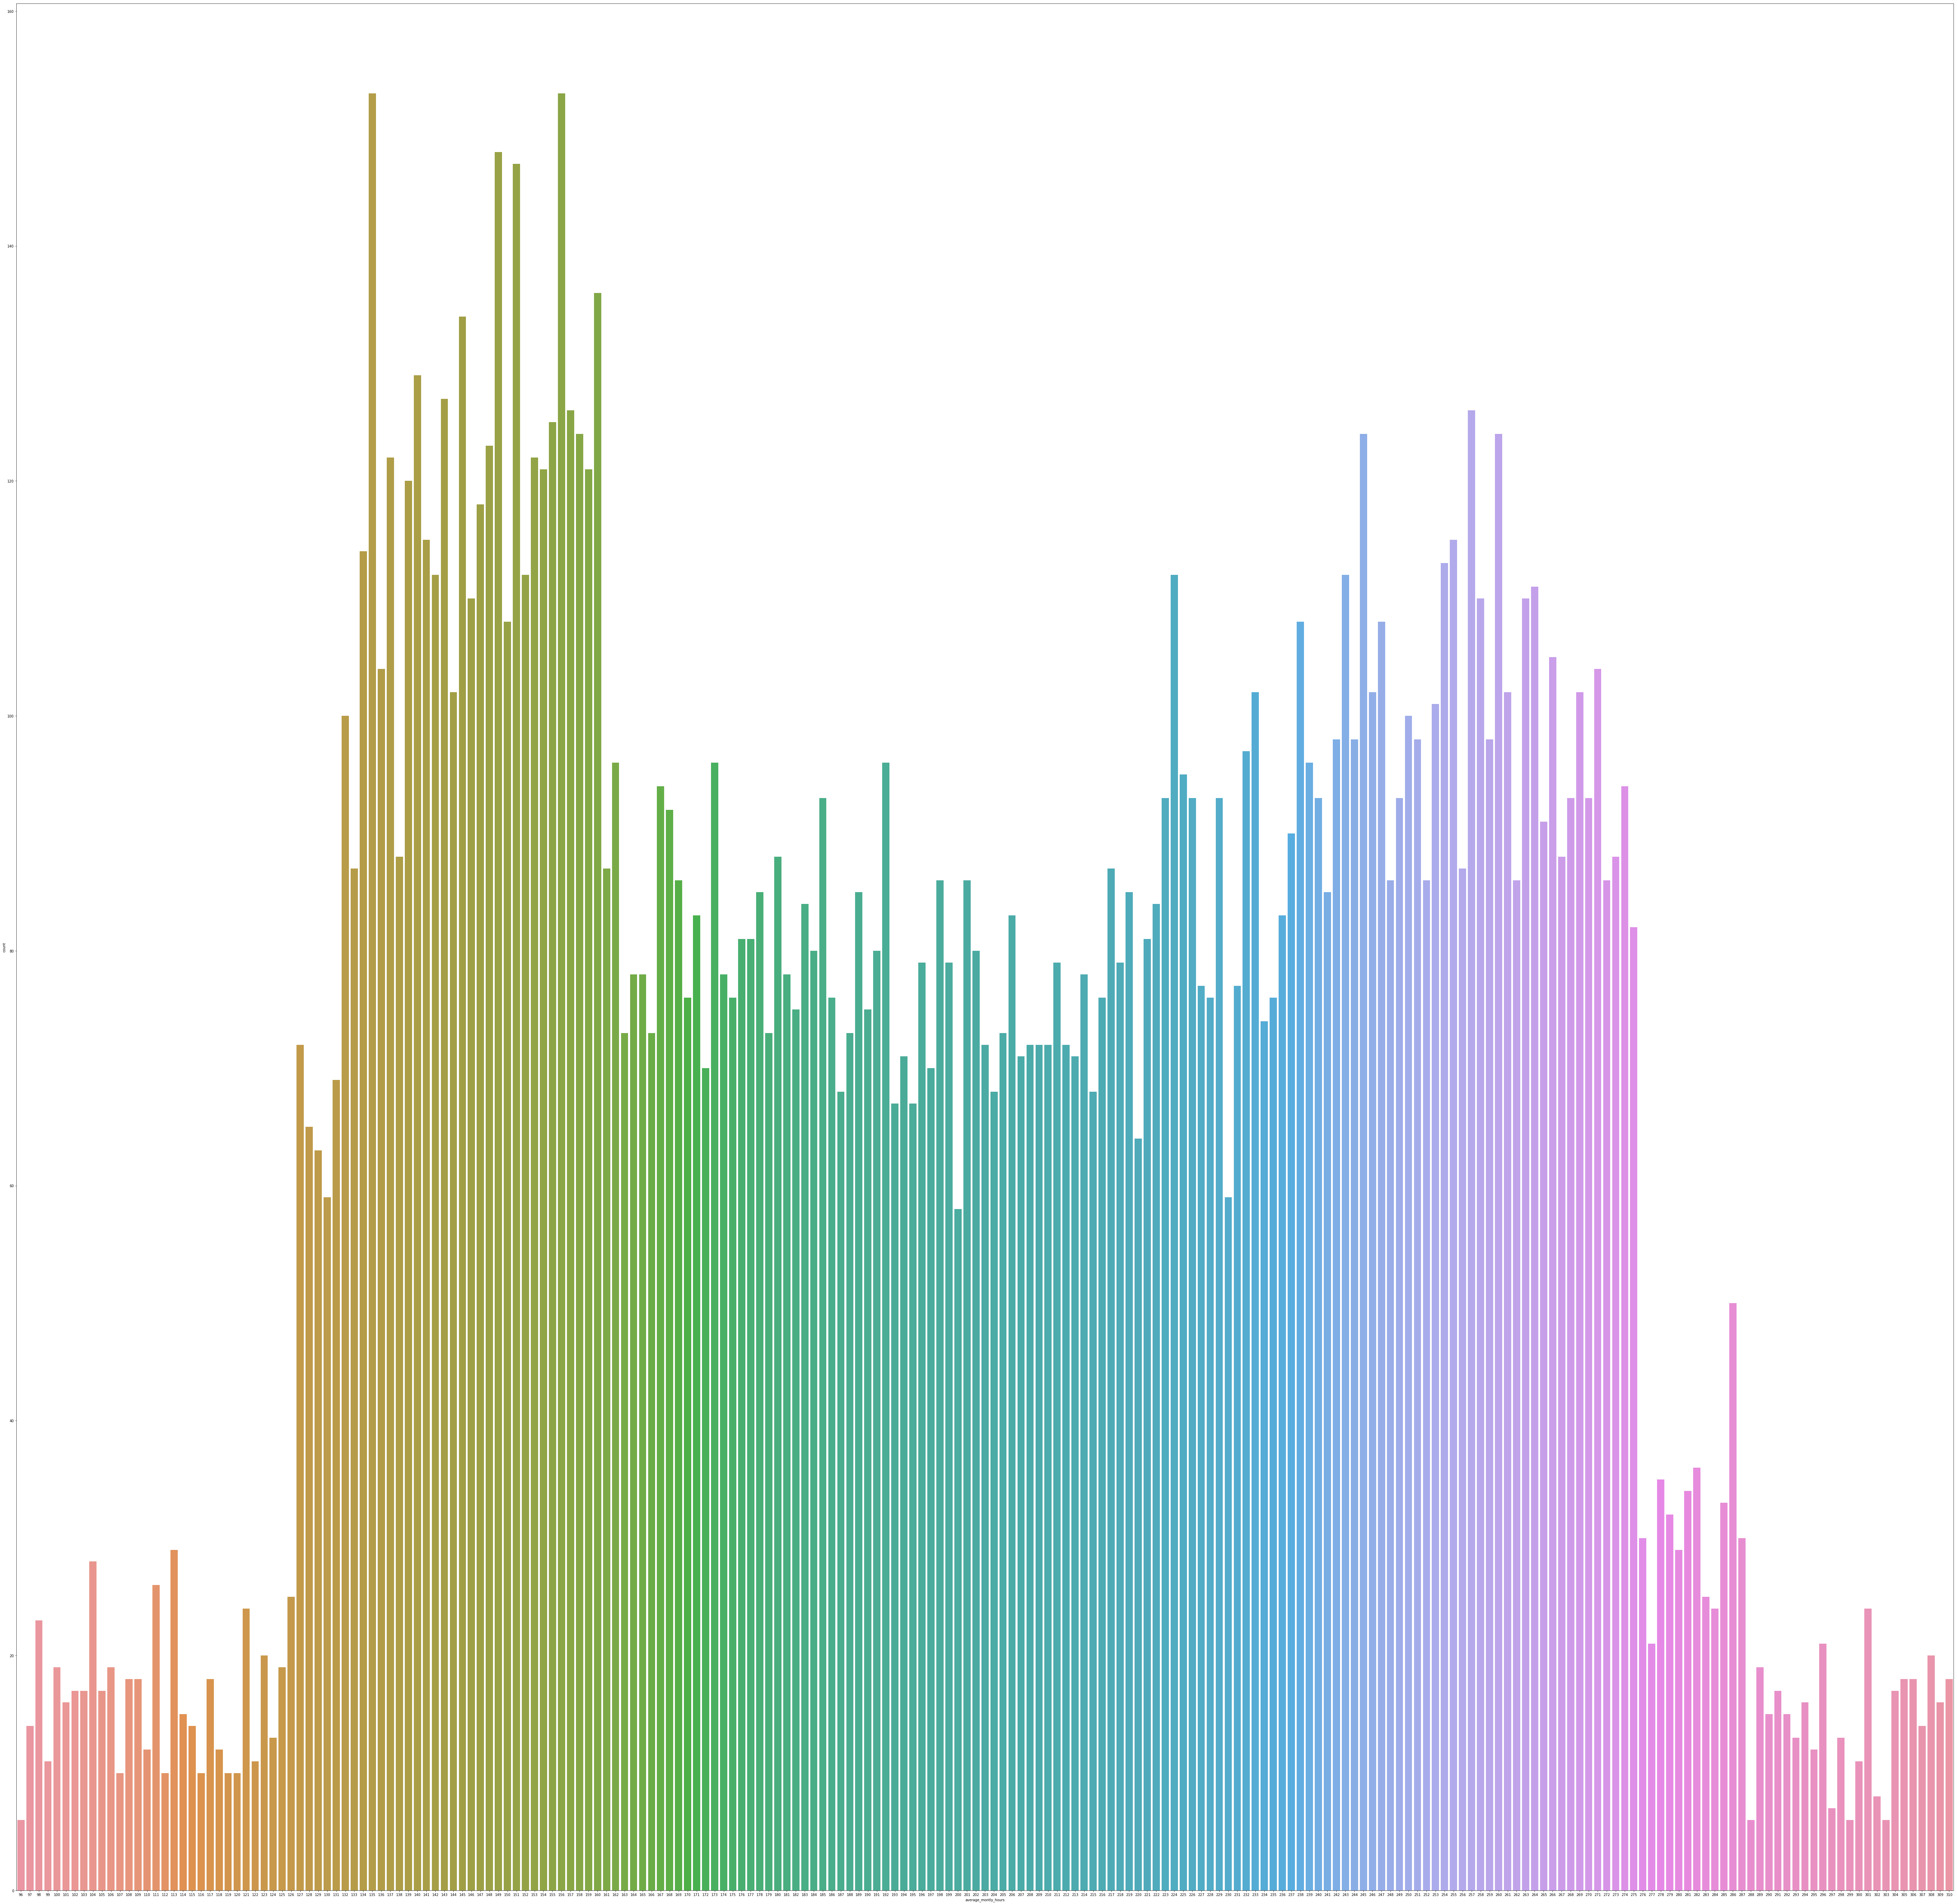

In [26]:
# To check the count of the average monthly hours spent by each employee in the company

fig,ax = plt.subplots(figsize=(100,100))
sns.countplot(HR['average_montly_hours'])
plt.show()

# 7

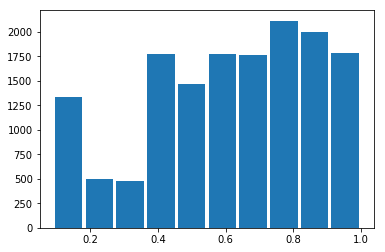

In [27]:
# Plotting a histogram for the satisfaction level

plt.hist(HR['satisfaction_level'],rwidth=0.9)                 # rwidth is used to increase the width of each block
plt.show()

# 8

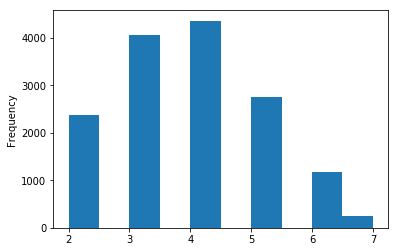

In [28]:
# Plotting a histogram for the number of project

HR['number_project'].plot.hist()
plt.show()

# 9

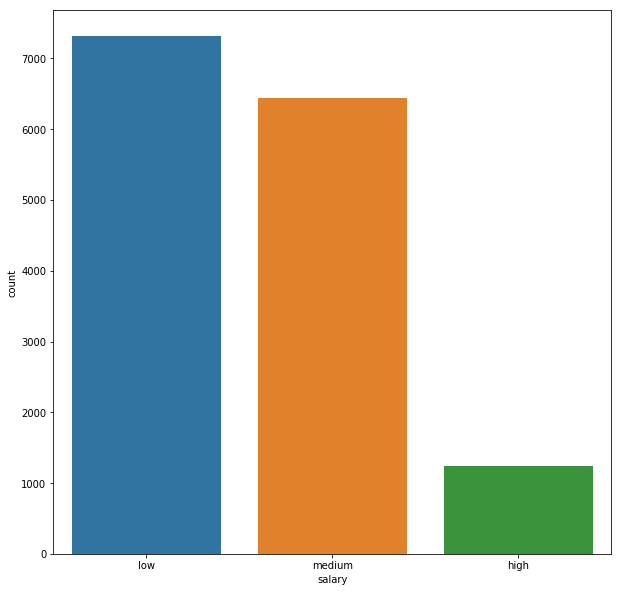

In [29]:
# Displays the count of members in salary low, medium and high

fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(HR['salary'])
plt.show()

# People with low salary are high when compared to medium and high.

# 10

In [30]:
HR['left'].value_counts()[1]             # Totally 3571 employees left the company

3571

# 11

In [31]:
HR['promotion_last_5years'].value_counts()      # People who got promotion in last 5 years are 319 in number.
                                                # Whereas people without promotion are very high in number with 14680

0    14680
1      319
Name: promotion_last_5years, dtype: int64

# 12

In [32]:
HR['Work_accident'].value_counts()   # People who did met with accident while coming to work is 2169 in number.

0    12830
1     2169
Name: Work_accident, dtype: int64

# 13

In [33]:
HR['department'].value_counts()      # The number of People working in each department are below.

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# 14

In [34]:
HR['salary'].value_counts()          # Number of people with different salary range and 7316 are with low salary range

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

# 15

In [35]:
HR.groupby(['department','salary']).size()   # Using groupby people with different salary range in each department.
                                             # Where people in sales department with low salary range is high in count
                                             # with 2099 while compared to other department

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64

# 16

In [37]:
b=HR.groupby(['department','left']).size()  
print(b)

# Using groupby people who left the company or not accordance to each department
# 1014 People working in sales department left their jobs which is more in number compared to other department.
# And 3126 people are still working in sales department.


department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
dtype: int64
